In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting(use_latex=True, pretty_print=False)

In [2]:
q1, q2, q3 = me.dynamicsymbols('q1, q2, q3')

In [3]:
L, H, R = sm.symbols('L, H, R')

In [4]:
A = me.ReferenceFrame('A')
N = me.ReferenceFrame('N')

In [5]:
E = N.orientnew('E', 'Axis', (q2, -N.z))

In [6]:
D = E.orientnew('D', 'Axis', (q3, E.y))

In [7]:
D.ang_vel_in(E)

In [8]:
E.ang_vel_in(N)

In [9]:
N.set_ang_vel(A, 0)

In [10]:
N.ang_vel_in(A)

In [11]:
D.ang_vel_in(A)

In [12]:
D.ang_vel_in(E)

In [13]:
M = me.Point('M')

In [14]:
P = M.locatenew('P', q1 * N.x)

In [15]:
Q = P.locatenew('Q', (H+R)*E.z)

In [16]:
O = Q.locatenew('O', -L * E.x - H * E.z)

In [17]:
O.pos_from(M)

In [18]:
S = P.locatenew('S', -L * E.x)

In [19]:
S.pos_from(M)

In [20]:
S.pos_from(P).dt(N)

In [21]:
S = O.locatenew('S', -R * E.z)

In [22]:
S.pos_from(O)

In [23]:
S.pos_from(M)

In [24]:
S.pos_from(M).dt(N)

In [25]:
M.set_vel(A, 0)

In [26]:
P.set_vel(A, q1.diff() * N.x)
P.vel(A)

In [27]:
Q.set_vel(A, q1.diff() * N.x)
Q.vel(A)

In [28]:
O.v2pt_theory(Q, A, E)

In [29]:
Q.vel(A) + E.ang_vel_in(A).cross(O.pos_from(Q))

In [30]:
v_S_A = S.v2pt_theory(O, A, D)
v_S_A

In [31]:
v_S_A.dot(E.y)

In [32]:
v_S_A.dot(E.x)

In [33]:
sm.Eq(0, v_S_A.dot(E.x))

In [34]:
sm.Eq(0, v_S_A.dot(E.y))

In [35]:
n = 3
m = 2
p = n - m
p # number of dof

In [36]:
DfDq1 = sm.cos(q2)
DfDq3 = -R
DfDq2 = sm.S(0)

In [37]:
sm.Eq(DfDq1.diff(q2), DfDq2.diff(q1))

In [38]:
sm.Eq(DfDq2.diff(q3), DfDq3.diff(q2))

In [39]:
sm.Eq(DfDq1.diff(q3), DfDq3.diff(q1))

In [40]:
type(0)

int

In [41]:
type(sm.S(0))

sympy.core.numbers.Zero

In [42]:
u1, u2, u3 = me.dynamicsymbols('u1, u2, u3')

In [43]:
kin_diff = sm.Eq(u1, q1.diff())
kin_diff

In [44]:
nh_con_eq1 = sm.Eq(0, v_S_A.dot(E.x)).xreplace({q1.diff(): u1})
nh_con_eq1

In [45]:
nh_con_eq2 = sm.Eq(0, v_S_A.dot(E.y)).xreplace({q1.diff(): u1})
nh_con_eq2

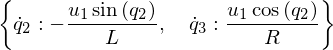

In [46]:
sm.solve([nh_con_eq1, nh_con_eq2],
         q3.diff(), q2.diff())